In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import os
from mypackages.eRDF import *
from tqdm import tqdm 
from mypackages.edp_processing import peak_calibration

from matplotlib import rcParams, cycler
from matplotlib.ticker import AutoMinorLocator

from mypackages.plot_style import set_plot_style

set_plot_style()

C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:276: SyntaxWarning: invalid escape sequence '\A'
  ax[0].set_xlabel("Q ($\AA^{-1}$)")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:282: SyntaxWarning: invalid escape sequence '\p'
  ax[1].plot(self.q, fq, label="$\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:283: SyntaxWarning: invalid escape sequence '\A'
  ax[1].set_xlabel("Q ($\AA^{-1}$)")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:284: SyntaxWarning: invalid escape sequence '\p'
  ax[1].set_ylabel("$\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:285: SyntaxWarning: invalid escape sequence '\p'
  ax[1].set_title("Calculating $\phi(Q)$")
C:\Users\seccolev\data_processing\src\mypackages\eRDF.py:291: SyntaxWarning: invalid escape sequence '\A'
  ax[2].set_xlabel("r ($\AA$)")


The calculated calibration factor ds: 0.00743649587727647


<function matplotlib.pyplot.show(close=None, block=None)>

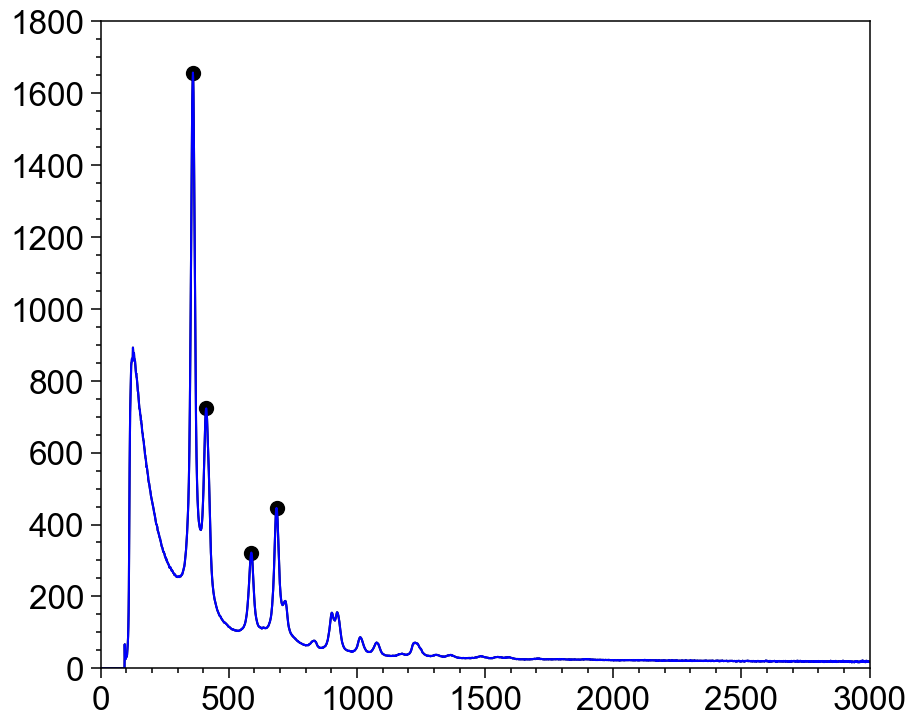

In [ ]:
#gold peak calibration
from scipy.signal import find_peaks

path = rC:\Users\seccolev\data_processing\data\processed\ePDF\Au\20250716"

start_name = 'Au_rolling.csv'

df1 = pd.read_csv(os.path.join(path, start_name), header = None)
#df2 = pd.read_csv(os.path.join(path, end_name), header = None)

data_start = df1[0].mean(axis=1)
#data_end = df2[0].values

peaks_start, _ = find_peaks(data_start, distance = 40, height=300)
#peaks_end, _ = find_peaks(data_end, distance = 40, height=500)



calibration = peak_calibration(pixel_positions = peaks_start[3:7])
#calibration_end = peak_calibration(pixel_positions = peaks_end[1:5])

#calibration = (calibration_start +calibration_end)/2

#peaks_end, _ = find_peaks(data_end, distance = 1, height=500)

plt.plot(data_start)
plt.plot(df1[0].values)
plt.scatter(peaks_start[3:7], data_start[peaks_start[3:7]])
plt.show


The calculated calibration factor ds: 0.012838115931106215


<function matplotlib.pyplot.show(close=None, block=None)>

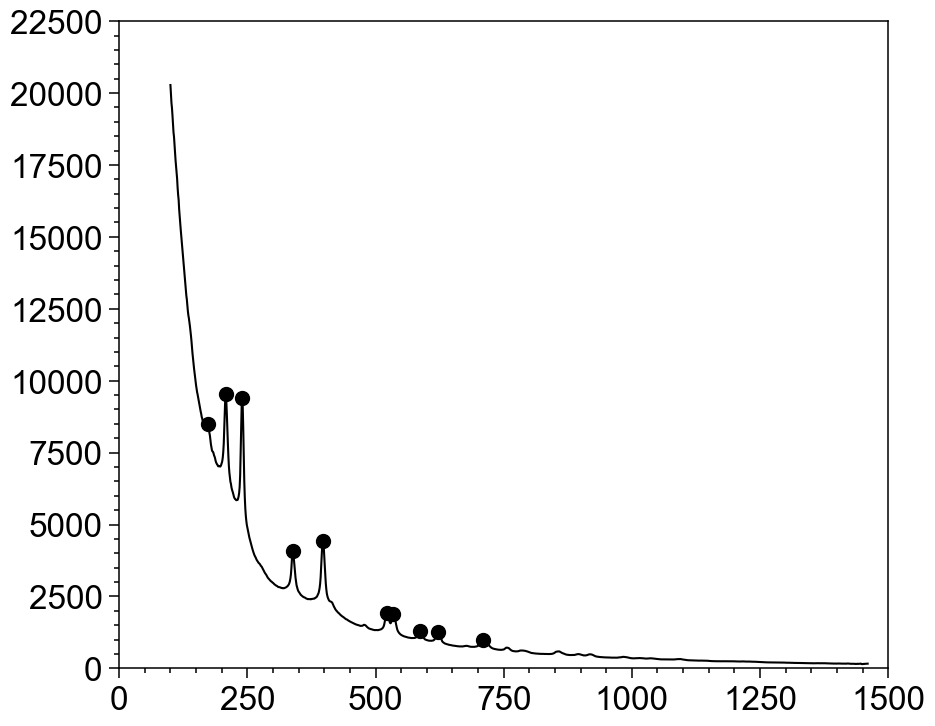

In [62]:


#gold peak calibration
from scipy.signal import find_peaks


start_name = r"C:\Users\seccolev\data_processing\data\processed\ePDF\Au\20250716\Au_rolling.csv"

df1 = pd.read_csv(start_name, header = None)


start =100
data = df1.mean(axis=1)[start:]

peaks_start, _ = find_peaks(data, distance = 10, height=200, prominence=100)

calibrate = True
sub = True

if calibrate:
    if sub:
        indices = [1,2,3,4] 
        subset = [peaks_start[i] for i in indices]
        subset = np.array(subset)
        calibration = peak_calibration(pixel_positions = subset+start, standard="gold")
    else:
        calibration = peak_calibration(pixel_positions = peaks_start+start, standard="gold")

plt.plot(data)
plt.scatter(peaks_start+start, data[peaks_start+start])
plt.show

In [63]:
4*np.pi*np.sin(np.radians(0.001/2))/0.033492

np.float64(0.0032742825487227763)

In [ ]:
np.rad2deg(np.arcsin(dp1.q/(4*np.pi)*0.033492)*2)

ValueError: x and y must have same first dimension, but have shapes (4500,) and (1,)

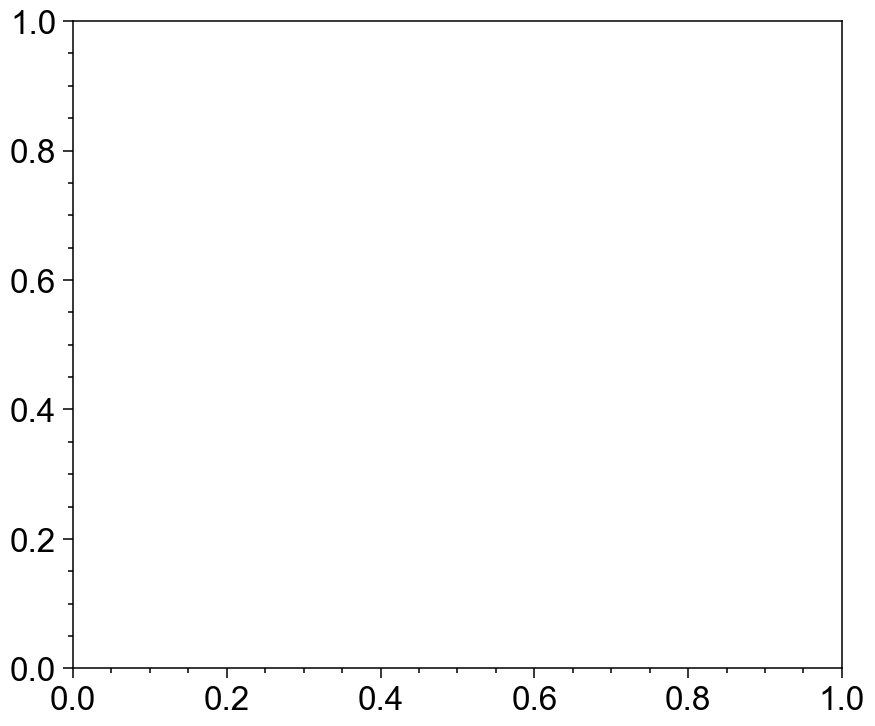

In [79]:
plt.plot(dp1.q, db)

In [22]:
#df1 = pd.read_csv(start_name, header = None)

dq = 0.0032742825487227763
ds = (dq)/(2*math.pi) #AuNPs


# Assume iq is your intensity array (e.g., shape (4500,))
N = iq.shape[0]

# Generate q range: q = dq * index
q = dq * np.arange(N)  # q array from 0 to (N-1)*dq

# Now apply Debye-Waller factor with B = 2 Å²
def debye_waller(q, B):
    s = q / (4 * np.pi)
    return np.exp(-B * s**2)

db = debye_waller(q, B=5)

start = 0
data = iq


CdSe =  {1: [30, 1], 2: [8, 1],}
Magnetite = {'Fe': [28, 2], 'O': [8, 3],}

start = 0
qmax =18 # For example
end = int(qmax / (ds * 2 * math.pi))

end = min(end, data.shape[-1])

dp1 = DataProcessor(data = data, lobato_path= None, start= start, end = end, ds = ds, Elements = Magnetite, region = 0, radiation_type="electron")
 

sq, fq = dp1.SQ_PhiQ(dp1.iq, 0)
r, Gr = dp1.Gr(fq, rmax=80, dr=0.05)


dp1.plot_results(fq, r, Gr0=Gr)
dp1.q.max()


IndexError: invalid index to scalar variable.

In [29]:
for element in Magnetite:
    print(element)
    print(Magnetite[element])
    print(Magnetite[element][0])

for element in Magnetite:
    if Magnetite[element]:
        print(Magnetite[element][2])

Fe
[28, 2, 0.4]
28
O
[8, 3, 0.6]
8
0.4
0.6


In [ ]:
def load_waasmaier_yaml(yaml_path):
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    return data


wk_factors= load_waasmaier_yaml(r"C:\Users\seccolev\data_processing\src\mypackages\data\elements_info.yaml")

elements = [element for element in Magnetite if Magnetite[element]]

params = wk_factors[[0]][:9] 

KeyError: 0

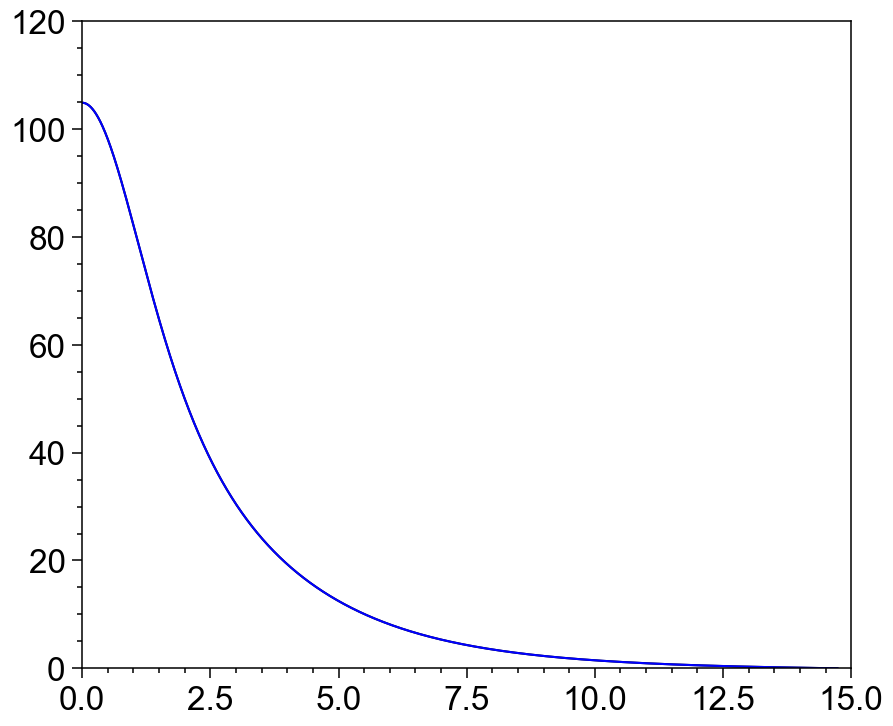

In [26]:
plt.plot(dp1.q, xray)
plt.plot(dp1.q, dp1.autofit)

In [47]:
df1 = pd.read_csv(r"C:\Users\seccolev\data_processing\data\processed\ePDF\Fe3O4\F-Fe3O4-E-A-S6\20250707\Fe3O4-E-A.csv")
df1

,0,1,2,3,4,5,6,7,8,9,...,149,150,151,152,153,154,155,156,157,158
0,58730.000000,58746.000000,58741.000000,58741.000000,58742.000000,58751.000000,58732.000000,58740.000000,58733.000000,58744.000000,...,58740.000000,58751.000000,58738.000000,58737.000000,58746.000000,58756.000000,58741.000000,58740.000000,58736.000000,58730.000000
1,58758.219793,58764.011665,58760.807957,58762.969793,58764.258841,58764.712549,58758.903364,58761.501596,58760.631630,58761.677922,...,58761.969793,58762.550712,58758.227038,58757.057957,58760.114317,58762.099828,58760.670678,58759.477038,58759.614317,58759.653364
2,58699.677364,58702.957892,58702.040650,58703.604803,58706.269424,58705.093928,58702.218459,58701.054557,58699.491000,58704.520439,...,58700.511797,58701.779570,58699.133388,58698.558278,58702.422219,58700.156832,58699.981913,58701.260656,58700.456564,58701.607100
3,58705.745083,58707.187128,58708.029226,58708.813792,58709.085004,58710.255948,58707.119517,58705.733751,58704.566742,58710.181622,...,58706.854974,58706.572244,58704.322394,58705.580481,58707.224375,58706.060927,58705.349781,58706.298976,58705.960431,58705.893855
4,58686.004235,58686.369120,58688.500584,58689.324237,58689.047635,58688.671398,58686.472981,58685.849583,58683.428469,58690.849483,...,58686.604839,58686.758366,58685.628857,58685.488273,58686.870853,58686.555278,58685.535129,58686.539440,58686.628443,58685.630728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1019.475240,1014.317328,1016.278101,1011.311429,1014.116237,1014.954874,1011.145672,1017.289337,1014.530659,1010.543401,...,1026.846984,1026.757735,1023.583129,1026.712609,1026.321221,1029.475240,1023.516915,1030.374694,1028.119688,1026.904852
1456,1017.028297,1020.594830,1016.864486,1019.683541,1013.138843,1013.279252,1015.940272,1012.681974,1015.560952,1009.089592,...,1024.740135,1033.878097,1025.070205,1022.552923,1021.957211,1029.966122,1020.328503,1027.972584,1031.367277,1034.271908
1457,1007.813228,1014.211218,1014.435344,1011.438200,1018.798835,1013.903016,1013.438200,1016.370688,1017.905872,1017.992803,...,1020.208362,1029.469842,1028.392963,1031.965501,1021.663811,1023.323281,1029.571853,1016.096299,1021.788782,1030.020105
1458,1006.619602,1013.485264,1013.072196,1009.517249,1010.818597,1010.316084,1008.432831,1012.748915,1007.492803,1009.724126,...,1030.487434,1032.704021,1021.473041,1024.283756,1025.803518,1017.502856,1023.383596,1019.530158,1017.539867,1021.263994


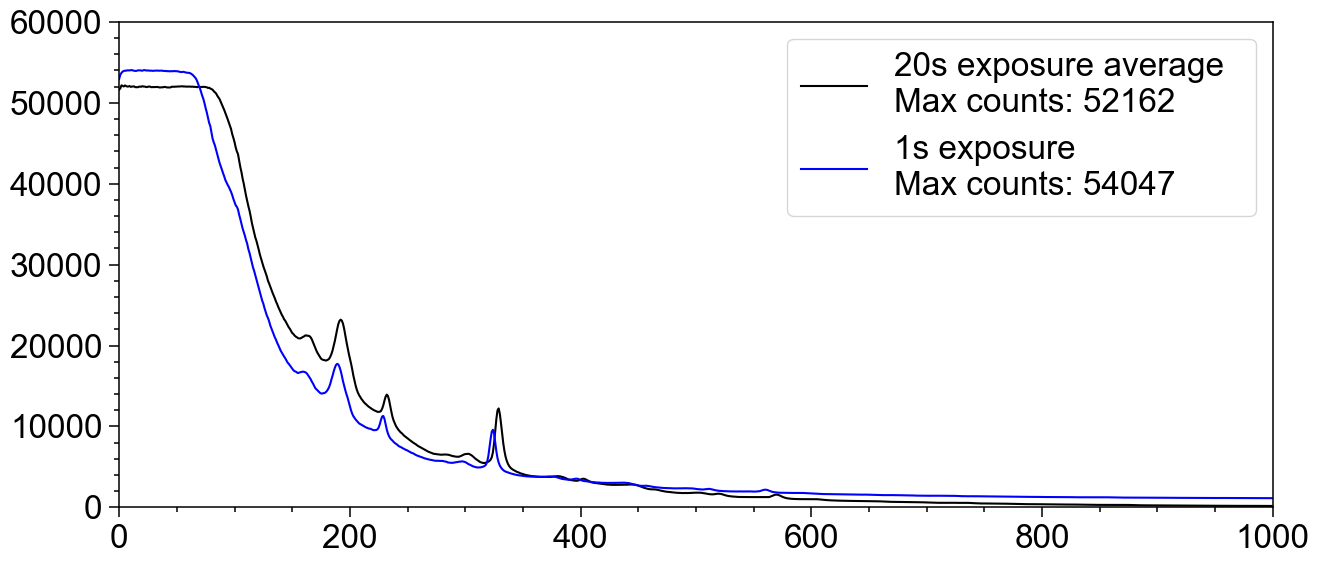

In [55]:
df = pd.read_csv(r"C:\Users\seccolev\data_processing\data\processed\ePDF\Fe3O4\F-Fe3O4-E-A-S6\20250703\Fe3O4-summed-1000-center-350.csv")
df1 = pd.read_csv(r"C:\Users\seccolev\data_processing\data\processed\ePDF\Fe3O4\F-Fe3O4-E-A-S6\20250708\B-Fe3O4-E-A.csv")

plt.figure(figsize=(15,6))
plt.plot(df["0"].values/20, label='20s exposure average  \nMax counts: 'f"{np.max(df['0'].values/20):.0f}")
plt.plot(df1["0"].values, label='1s exposure \nMax counts: 'f"{np.max(df1['0'].values):.0f}")
plt.xlim(0, 1000)
plt.legend()
plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt



# Normalize the data
norm_data = data[start:end] / (dp1.N * dp1.fq_sq)
norm_data = norm_data * dp1.q

degree = 8
# Fit the polynomial
coefficients = np.polyfit(dp1.q, norm_data, degree)
polynomial = np.poly1d(coefficients)

# Generate x values for plotting the polynomial fit
x_fit = np.linspace(dp1.q.min(), dp1.q.max(), len(norm_data))
y_fit = polynomial(x_fit)

# Calculate _fq_poly and apply Butterworth lowpass filter
fq_poly = norm_data - y_fit


In [2]:
from scipy.interpolate import interp1d

df = pd.read_csv(r"\\fshomes\seccolev$\Downloads\Fe3O4_1513304.int", sep=r"[\t ]+", engine="python", skiprows=2, header=None)
df.drop(columns=[2], inplace=True)

tth = df[0].values
iq = df[1].values

# Simulated data
small_array = np.random.rand(1277)
large_array = np.random.rand(4500)  # Just for reference length


x_large = np.linspace(dp1.q.min(), dp1.q.max(), len(large_array))  # interpolation targets

# Create interpolation function
interpolator = interp1d(dp1.q, dp1.fq_sq, kind='linear')  # or 'cubic'

# Interpolated array
fq_sq = interpolator(x_large)  # Now shape is (4500,)

print(fq_sq.shape)  # (4500,)


plt.plot(tth, iq)

plt.plot(np.rad2deg(np.arcsin(dp1.q/(4*np.pi)*0.033492)*2), fq_poly/dp1.q)
plt.plot(tth, iq/iq.max()*fq_sq-0.5)

plt.xlim(0.3,5)



NameError: name 'dp1' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mypackages.eRDF import calc_Gr, calc_Gr_Lorch

df = pd.read_csv(r"E:\data_processing\data\raw\ED\In2O3\Results\fq_pca_In2O3_S4.csv", header = 0, sep="\t")



# Calculate G(r)
r, Gr = calc_Gr(dp1.q, fq_poly, rmax=60, dr=0.05)

# Create 2x1 subplot
fig, axs = plt.subplots(1,2, figsize=(15, 6), sharex=False)

# Plot F(Q)
axs[0].plot(dp1.q, fq_poly, label='8 rois pca mean')
#axs[0].bar(br, i*4, width=0.05)
axs[0].set_xlim(1, 20)
axs[0].set_xlabel('q (1/Å)')
axs[0].set_ylabel('F(Q)')
axs[0].set_title('F(Q) MnO')
axs[0].legend(fontsize=10)

# Plot G(r)
axs[1].plot(r, Gr, label='G(r)')
axs[1].set_xlim(0, 60)
axs[1].set_xticks(np.arange(0, 60, 5))
axs[1].set_xlabel('r (Å)')
axs[1].set_ylabel('G(r)')
axs[1].set_title('G(r) MnO')
axs[1].legend(fontsize=10)

plt.tight_layout()
plt.show()


NameError: name 'fq_poly' is not defined

NameError: name 'q_cmos' is not defined

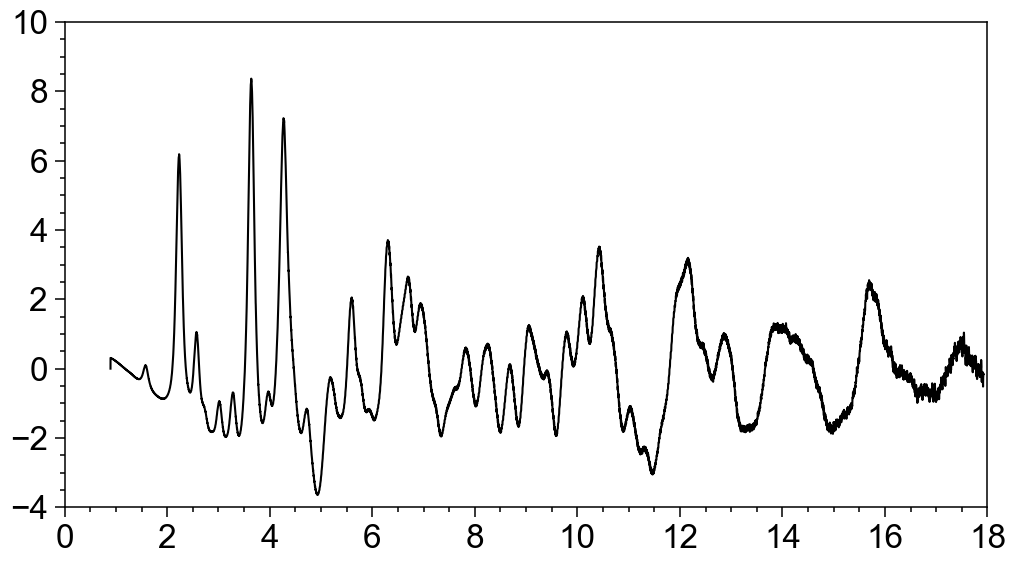

In [57]:
df = pd.read_csv(r"E:\data_processing\data\raw\ED\In2O3\Results\fq_pca_In2O3_S4.csv", header = 0, sep="\t")

plt.figure(figsize=(12, 6))
plt.plot(df["q"], df["fq"], label='CCD 300 kV beamstopper b1 16 s exp spot 1')
plt.plot(q_cmos, fq_cmos*2-15, label ='CMOS 120 kV b2 160s exp spot 4')
plt.xlim(1.5,18)
plt.xlabel('q (1/Å)')
plt.ylabel('F(Q) In2O3')
plt.legend(fontsize=15)
plt.show()

In [ ]:
df = pd.read_csv(r"\\fshomes\seccolev$\Downloads\MnO__1010393.txt", sep=r"[\t ]+", engine="python")

# Reflection intensities
i = df["I"].values / 100  # normalized

# Q from d-spacing
br = 2 * np.pi / df["d(Å)"].values  # same as Q


# Plot
plt.bar(br, i, width=0.05)
plt.xlabel("Q (1/Å)")
plt.ylabel("Weighted Intensity")
plt.title("Weighted Reflection Intensities")
plt.show()